# HSE-2024 text classification project

## Table of content
* [Imports](#c1)
* [Data loading and preprocessing](#c2)
* [Custom dataset](#c3)
* [Custom model](#c4)
* [Trainer](#c5)
* [Model training](#c6)

### Imports <a class="anchor" id="c1"></a>

In [31]:
import numpy as np
import pandas as pd

import torch
from sklearn.model_selection import train_test_split

import os

from classes import Preprocessor, MyModel, Trainer

### Data loading and preprocessing <a class="anchor" id="c2"></a>

In [32]:
RANDOM_STATE = 42
torch.manual_seed(RANDOM_STATE)

In [33]:
base_dir = 'data/'
if not os.path.exists(base_dir):  # создадим папку, куда будем сохранять модели, и где будут лежать данные
    os.makedirs(base_dir)

In [34]:
texts = pd.read_csv(f'{base_dir}texts_and_metadata.txt', sep='\t')
texts.sample(3)

,document.id,source,stage,source_text,lemm_text,city,region,date
12021,1046637453,iqbuzz,3,"[[id232244558|Евгений], что же Вы тогда все по...",евгений тогда писать русскоязычный ресурс зави...,Самара,Самарская область,2015-10-03
7602,754571567,iqbuzz,3,"[[id42150588|Илья], а <b>восточноевропеец</b> ...",илья восточноевропеец русский другой новиоп са...,Саратов,Саратовская область,2015-02-10
4964,1042765126,iqbuzz,2,"[[id176486367|Анатолий], ага.мало пацанов поги...",анатолий пацан погибнуть этот два война славян...,Оренбург,Оренбургская область,2015-09-29


In [35]:
data = pd.read_csv(f'{base_dir}coding_results.txt', low_memory=False, sep='\t')
data.sample(3)

,document.id,source,stage,data,assessor,seed_eth_group,for_questions_about_text,do_text_make_sense_raw,do_text_make_sense_recoded,has_ethnonym_raw,...,represent_ethicity_raw,represent_ethicity_meaning,is_ethicity_superior_raw,is_ethicity_superior_meaning,is_ethicity_aggressor_raw,is_ethicity_aggressor_meaning,is_ethicity_dangerous_raw,is_ethicity_dangerous_meaning,comment,old_id
69402,723565995,iqbuzz,2,2016-10-04 22:18:21,skuchilina,манси,0,yes,1,several,...,1.0,no,3.0,irrel,3.0,irrel,1.0,no,NaN,манси_98
25883,789295545,iqbuzz,3,2017-03-28 22:39:38,adzhigitova,ненец,1,yes,1,one,...,2.0,unk,3.0,irrel,3.0,irrel,1.0,no,NaN,789295545
49732,1064863490,iqbuzz,3,2017-03-21 16:40:07,belchonok,азербайджанец,1,yes,1,several,...,2.0,unk,3.0,irrel,3.0,irrel,1.0,no,"казах, татарин, грузин, турок",1064863490


In [36]:
df = texts.merge(data, how='left')
df.sample(5)

,document.id,source,stage,source_text,lemm_text,city,region,date,data,assessor,...,represent_ethicity_raw,represent_ethicity_meaning,is_ethicity_superior_raw,is_ethicity_superior_meaning,is_ethicity_aggressor_raw,is_ethicity_aggressor_meaning,is_ethicity_dangerous_raw,is_ethicity_dangerous_meaning,comment,old_id
40476,704839066,iqbuzz,3,Я летом делала ремонт в своей комнате. Нашла о...,летом делать ремонт свой комната найти объявле...,Красноярск,Красноярский край,2015-01-15,2017-03-31 22:41:19,alyonam,...,1.0,no,1.0,low,2.0,agressor,1.0,no,NaN,704839066
83006,4028481,vk,1,#Чечня@war_veterans ??ДРУЖБА ЧЕЧЕНЦА И РУССКОГ...,чечня war veterans дружба чеченец друг афганец...,Ковылкино,Мордовия,2015-03-28,2016-07-29 15:38:20,yadviga,...,1.0,no,3.0,irrel,3.0,irrel,1.0,no,NaN,4028481
22033,997003607,iqbuzz,2,мда!!все все видят просто еслиб себя все вели ...,мда видеть просто еслиб вели нормальный уважат...,Нальчик,Кабардино-Балкарская,2015-08-18,2016-09-25 00:34:35,alyonam,...,1.0,no,2.0,high,3.0,irrel,1.0,no,NaN,осетин_85
34978,405855041,iqbuzz,3,Сообщение от Клевер значит надо в европу и чем...,re украина продолжать дебаты сообщение клевер ...,Москва,Москва,2014-03-16,2017-03-21 13:53:57,mintbreeze,...,2.0,unk,3.0,irrel,3.0,irrel,1.0,no,NaN,405855041
77441,307677,vk,1,"Тарас Бульба (2009)Жанр: боевик, драма, военны...",тарас бульб жанр боевик драм военный мотив изв...,Краснодар,Краснодарский край,2014-12-28,2016-07-27 17:34:35,Dasha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307677


In [37]:
df.shape

(84784, 61)

In [38]:
df['do_text_make_sense_raw'].value_counts()

do_text_make_sense_raw
yes     78372
no       4334
lang     1890
joke      188
Name: count, dtype: int64

In [39]:
df.drop(df[df['do_text_make_sense_raw'] == 'no'].index, inplace=True)

In [40]:
ops = ['is_text_positive_recoded', 'is_text_neg_recoded']
df[ops] = df[ops].apply(pd.to_numeric, errors='coerce')
pos_ = df['is_text_positive_recoded']
neg_ = df['is_text_neg_recoded']
df.loc[(pos_ > 0) & (neg_ < 0), ops] = None
df.loc[neg_ < 0, 'text_sentiment'] = -1
df.loc[pos_ > 0, 'text_sentiment'] = 1
df.loc[(neg_ == 0) & (pos_ == 0), 'text_sentiment'] = 0

In [41]:
args = ['text_sentiment', 'has_eth_conflict_raw', 'has_pos_eth_interaction_raw', 'opinion_about_ethnonym_recoded',
        'is_ethicity_superior_meaning', 'is_ethicity_aggressor_meaning',
        'is_ethicity_dangerous_meaning']
MAX_SPOIL = len(args)
topic_to_russian = {'culture': 'культура', 'economics': 'экономика', 'ethicity': 'этничность', 'history': 'история',
                    'humour': 'юмор', 'daily_routine': 'рутина', 'migration': 'миграция', 'other': 'другая',
                    'politics': 'политика', 'religion': 'религия', 'society_social': 'социальная'}
MAX_SPOIL

7

In [42]:
df['has_pos_eth_interaction_raw'].value_counts()

has_pos_eth_interaction_raw
no     62783
yes    13603
unk     1986
Name: count, dtype: int64

In [43]:
var_vocab = {
    'text_sentiment': {'labels': {-1.0: 'этот текст является негативным', 0: 'этот текст является нейтральным',
                                  1.0: 'этот текст является позитивным'}, 'aspect_level': False},
    'has_eth_conflict_raw': {
        'labels': {'yes': 'в тексте есть этнический конфликт', 'no': 'в тексте этнический конфликт отсутствует',
                   'unk': None},
        'aspect_level': False},
    'has_pos_eth_interaction_raw': {'labels': {'yes': 'в тексте есть позитивное взаимодействие между этичностями',
                                               'no': 'в тексте не зафиксировано позитивного взаимодействия этичностей',
                                               'unk': None},
                                    'aspect_level': False},
    'opinion_about_ethnonym_recoded': {'labels': {-1: 'мнение об этничности \'{}\' отрицательное',
                                                  0: 'мнение об этничности \'{}\' нейтральное или не зафиксировано',
                                                  1: 'мнение об этничности \'{}\' положительное'},
                                       'aspect_level': True},
    # 'represent_ethicity_meaning': {'labels': {}, 'aspect_level': True}, # not using yet
    'is_ethicity_superior_meaning': {'labels': {'high': 'этничность \'{}\' является доминирующей',
                                                'low': 'этничность \'{}\' является отчасти доминирующей',
                                                'irrel': None},
                                     'aspect_level': True},
    'is_ethicity_aggressor_meaning': {'labels': {'agressor':
                                                     'этничность \'{}\' является агрессором',
                                                 'victim': 'этничность \'{}\' является жертвой',
                                                 'irrel': None},
                                      'aspect_level': True},
    'is_ethicity_dangerous_meaning': {
        'labels': {'yes': 'этничность \'{}\' является опасной',
                   'no': 'этничность \'{}\' не является опасной',
                   'irrel': None},
        'aspect_level': True},
}

In [44]:
df = df.fillna(np.nan).replace([np.nan], [None])

In [45]:
ids = df['document.id'].unique()
ids.shape  # 14196 после дропа по do_text_make_sence = no

(14196,)

In [46]:
preprocessor = Preprocessor.Preprocessor(df=df, args=args, var_vocab=var_vocab, topic_to_russian=topic_to_russian)

In [47]:
id_ = df['document.id'].sample().values[0]
descr, text = preprocessor.fit(id_)
print(id_, descr, text, sep='\n')

450360154
в тексте этнический конфликт отсутствует, в тексте не зафиксировано позитивного взаимодействия этичностей

Тягнибок призвал уничтожать террористов в Славянске, невзирая на угрозы Путина: Несмотря на прямые военные <b>угр</b>... <a href=\http://bit.ly/1jKGuhM\" target=\"_blank\"><u>http://bit.ly/1jKGuhM</u></a>"


In [48]:
descr_spoiled, text = preprocessor.fit(id_, spoil_size=len(preprocessor.args))
print(descr, descr_spoiled, sep='\n')

в тексте этнический конфликт отсутствует, в тексте не зафиксировано позитивного взаимодействия этичностей

в тексте есть этнический конфликт



In [49]:
descr_topics, _ = preprocessor.fit(id_, topic=True)
descr_topics_spoiled, _ = preprocessor.fit(id_, topic=True, topic_spoil=1)
print(descr_topics, descr_topics_spoiled, sep='\n')

в тексте этнический конфликт отсутствует, в тексте не зафиксировано позитивного взаимодействия этичностей

в тексте этнический конфликт отсутствует, в тексте не зафиксировано позитивного взаимодействия этичностей



### Custom dataset <a class="anchor" id="c3"></a>

In [50]:
process_ids, test_ids = train_test_split(ids, test_size=0.2, random_state=RANDOM_STATE)
train_ids, validate_ids = train_test_split(process_ids, train_size=0.75, random_state=RANDOM_STATE)

train = df.loc[df['document.id'].isin(train_ids)]
test = df.loc[df['document.id'].isin(test_ids)]
validate = df.loc[df['document.id'].isin(validate_ids)]
train.shape, test.shape, validate.shape  # percents are ≈ (60%, 20%, 20%)

((47999, 62), (16170, 62), (16281, 62))

### Custom model <a class="anchor" id="c4"></a>

In [51]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Device used: {device}.")

Device used: cpu.


In [52]:
model = MyModel.MyModel(device) # turn on the developer mode here
print(f"Model loaded. Model tokenizer is {model.tokenizer}.")

Model loaded. Model tokenizer is BertTokenizerFast(name_or_path='cointegrated/rubert-tiny2', vocab_size=83828, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}.


In [53]:
model.reinitialize()
print(f"Model reloaded. Model tokenizer is {model.tokenizer}.")

Model reloaded. Model tokenizer is BertTokenizerFast(name_or_path='cointegrated/rubert-tiny2', vocab_size=83828, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}.


### Trainer <a class="anchor" id="c5"></a>

In [54]:
params = {
    'batch_size': [10, 20],
    'lr': [1e-5, 2 * 1e-5, 1e-6, 2 * 1e-6],
    'max_spoil': range(0, MAX_SPOIL + 1),
    'spoil_proba': np.arange(0.1, 1 + 0.1, 0.1)
}
params['spoil_proba']

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [59]:
max_items = 1000  # just for demonstration
trainer = Trainer.Trainer(MyModel.MyModel, device, train[:max_items], validate[:max_items], test[:max_items], preprocessor=preprocessor, params=params)
# trainer = Trainer.Trainer(MyModel.MyModel, device, train, validate, test, preprocessor=preprocessor, params=params) # uncomment in real life situation

### Model training <a class="anchor" id="c6"></a>

In [60]:
torch.cuda.empty_cache()  # just in case

In [61]:
# trainer.choose_model()

In [62]:
# trainer.save()

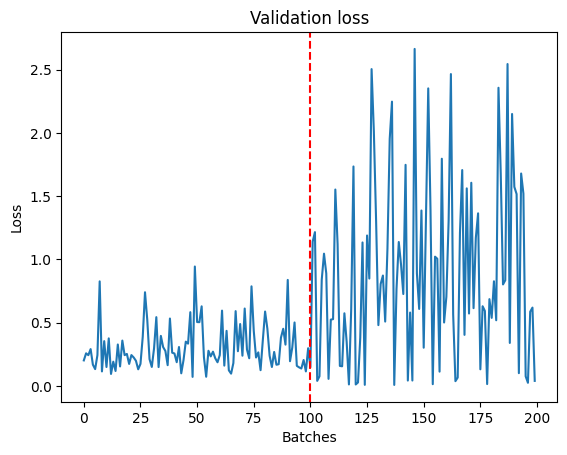

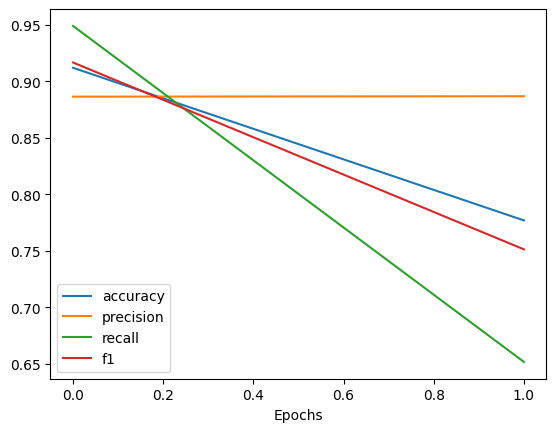

In [64]:
trainer.train(epochs=2)

In [ ]:
trainer.plot_loss(on_train=False)

In [ ]:
trainer.plot_metrics(on_train=False)